In [3]:
import librosa as lr
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

In [8]:
filepath = 'C:\\Users\\chorj\\Downloads\\WavFiles'
input_file1 = filepath + '\\Hercules_dry_Drums_Kick.wav'
input_file2 = filepath + '\\Hercules_dry_Drums_Loop.wav'

# Read the wav file 
samplerate1, data1 = wavfile.read(input_file1)
samplerate2, data2 = wavfile.read(input_file2)
print('Sampling rate = ', samplerate1)

Sampling rate =  44100


C:\Users\chorj\AppData\Local\Temp\ipykernel_52284\1017256550.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(input_file1)
C:\Users\chorj\AppData\Local\Temp\ipykernel_52284\1017256550.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate2, data2 = wavfile.read(input_file2)


In [9]:
#200000~400000 부분의 샘플만을 가져옵니다
sample1 = data1[250000:850000]
sample2 = data2[250000:850000]
#sample = data[1000000:1500000] : for consecutive data



In [11]:
def plot_waveform(sample):

    plt.figure(figsize=(12, 4))
    plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    plt.title("Stereo Audio Waveform")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

def plot_spectrogram(sample, sample_rate, title="Spectrogram", size=(12, 4)):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.pcolormesh(sample_rate, np.arange(0, sample.shape[0]), sample[:, 0].T)
    plt.show()

def plot_waveform_withBounds(sample, non_silent_segments):
    plt.figure(figsize=(12, 4))
    plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    for start, end in non_silent_segments:
        plt.axvline(x=start, color='green', linestyle='--', label="Segment Start")
        plt.axvline(x=end, color='red', linestyle='--', label="Segment End")
        #print(f"Non-silent segment: Start = {start}, End = {end}")

    plt.title("Stereo Audio with Non-Silent Segments")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    #plt.legend()
    plt.show()



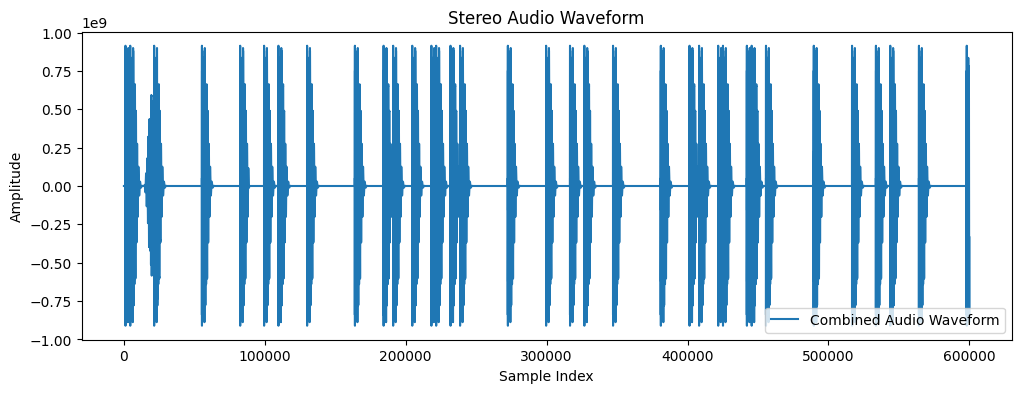

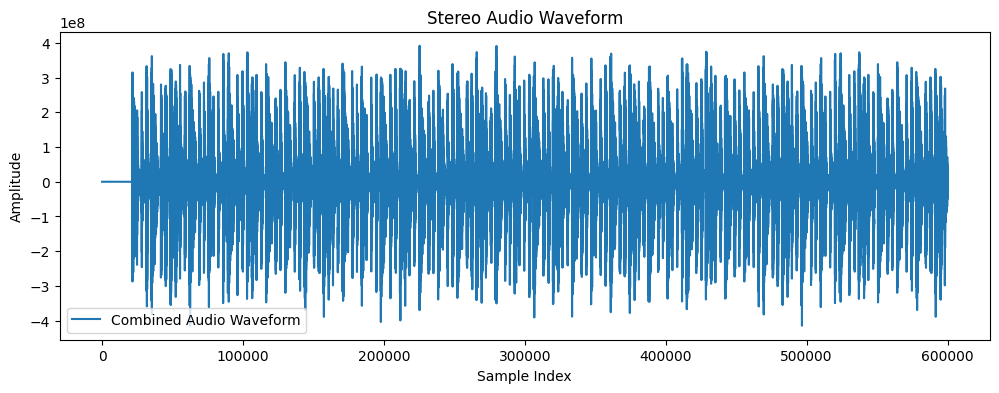

In [21]:
plot_waveform(sample1)
plot_waveform(sample2)


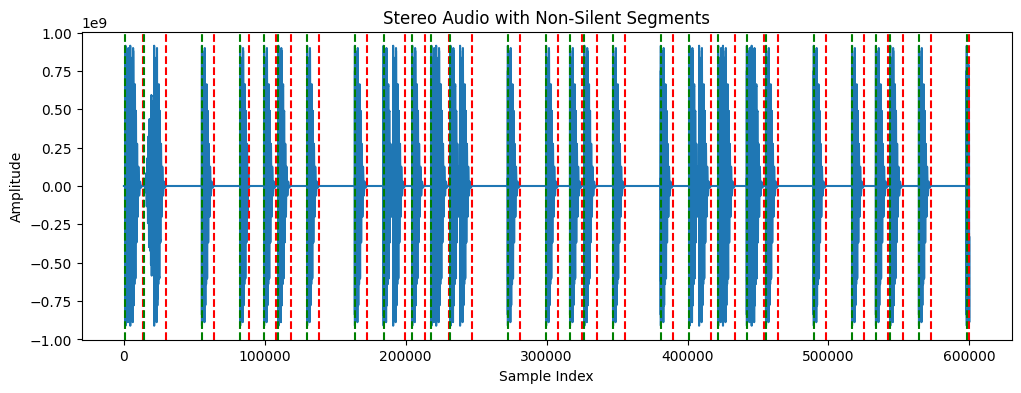

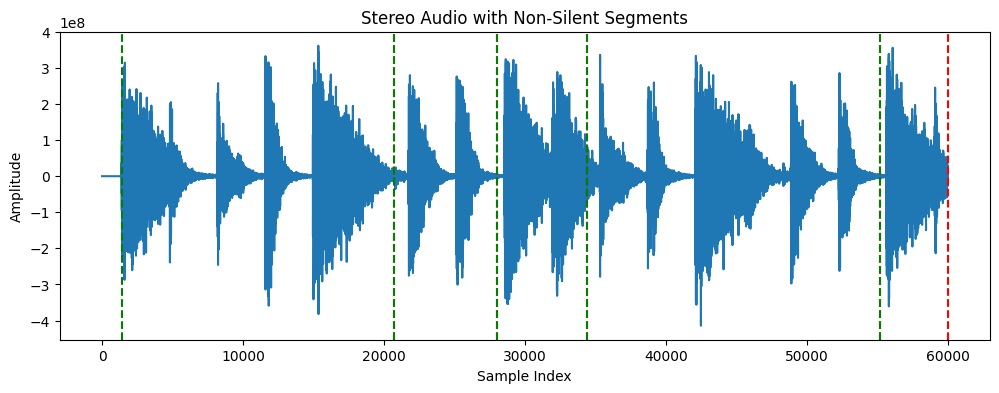

In [48]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

def find_non_silent_segments(data, silence_threshold, min_duration=0.1):
    """Find non-silent segments in the stereo audio data."""
    # Calculate the minimum length for a segment based on minimum duration
    min_segment_length = min_duration

    # Combine stereo channels by averaging
    combined_data = np.mean(data, axis=1)

    # Initialize variables
    segments = []
    start_index = None

    # Iterate over the combined audio data
    for i, sample in enumerate(combined_data):
        if abs(sample) > silence_threshold:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None and i - start_index > min_segment_length:
                segments.append((start_index, i))
                start_index = None

    # Check for the last segment
    if start_index is not None and len(combined_data) - start_index > min_segment_length:
        segments.append((start_index, len(combined_data)))

    return segments


# Define the silence threshold
silence_threshold = 1000  # Adjust this based on your audio

# Find non-silent segments
non_silent_segments1 = find_non_silent_segments(sample1,silence_threshold, min_duration=0.001)
non_silent_segments2 = find_non_silent_segments(sample2[20000:80000],silence_threshold, min_duration=0.01)
plot_waveform_withBounds(sample1, non_silent_segments1)
plot_waveform_withBounds(sample2[20000:80000], non_silent_segments2)


In [49]:
print('Number of non-silent segments = ', len(non_silent_segments1))
for i in range(len(non_silent_segments1)):
    print('Non-silent segment ', i+1, ' = ', non_silent_segments1[i], "duration: " + str((non_silent_segments1[i][1] - non_silent_segments1[i][0])))

Number of non-silent segments =  28
Non-silent segment  1  =  (1032, 13244) duration: 12212
Non-silent segment  2  =  (14600, 30206) duration: 15606
Non-silent segment  3  =  (55309, 64129) duration: 8820
Non-silent segment  4  =  (82447, 89012) duration: 6565
Non-silent segment  5  =  (99409, 108229) duration: 8820
Non-silent segment  6  =  (109586, 118406) duration: 8820
Non-silent segment  7  =  (129939, 138759) duration: 8820
Non-silent segment  8  =  (163863, 172683) duration: 8820
Non-silent segment  9  =  (184216, 199821) duration: 15605
Non-silent segment  10  =  (204570, 213390) duration: 8820
Non-silent segment  11  =  (218139, 230352) duration: 12213
Non-silent segment  12  =  (231709, 247313) duration: 15604
Non-silent segment  13  =  (272416, 281236) duration: 8820
Non-silent segment  14  =  (299555, 308375) duration: 8820
Non-silent segment  15  =  (316516, 325336) duration: 8820
Non-silent segment  16  =  (326693, 335513) duration: 8820
Non-silent segment  17  =  (347047

In [63]:
def exactSame(wav1, wav2):
    for i in range(len(wav1)):
        if wav1[i][0] != wav2[i][0] or wav1[i][1] != wav2[i][1]:
            return False
    return True

def checkSimilarity(wav1, wav2):
    length = len(wav1)
    difflength = 0
    diffratio = 0
    for i in range(len(wav1)):
        if wav1[i][0] != wav2[i][0] or wav1[i][1] != wav2[i][1]:
            difflength += 1
            diffratio += (wav2[i][1]/wav1[i][1] + wav2[i][1]/wav1[i][0])/2
            if difflength < 2:
                print("Different sample: wav1: " + str(wav1[i][0]) +"/" + str(wav1[i][1]) 
                + ", wav2: " + str(wav2[i][0]) + "/"+ str(wav2[i][1]))
    
    evaluation = diffratio / difflength * 100
    diffportion = difflength 
    print("Different samples: " + str(diffportion) + ", Evaluation: " + str(evaluation))

def checkDuplicate(wav, indexlist, duration):
    getfirst = True
    for i in range(len(indexlist)):
        startindex = indexlist[i][0]
        endindex = indexlist[i][1]
        if endindex - startindex == duration:
            if getfirst:
                Target = wav[startindex:endindex]
                getfirst = False
            else:
                #print("Comparing with the segment " + str(startindex) + " to " + str(endindex) + " duration= " + str(endindex - startindex) )
                if exactSame(Target, wav[startindex:endindex]):                  
                    print("Duplicate Found")
                else: 
                    print("Not a Duplicate")
                    checkSimilarity(Target, wav[startindex:endindex])

checkDuplicate(sample1, non_silent_segments1, 8820)

Not a Duplicate
Different sample: wav1: 800256/777472, wav2: 800000/777472
Different samples: 163, Evaluation: 95.52084869087912
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Eva

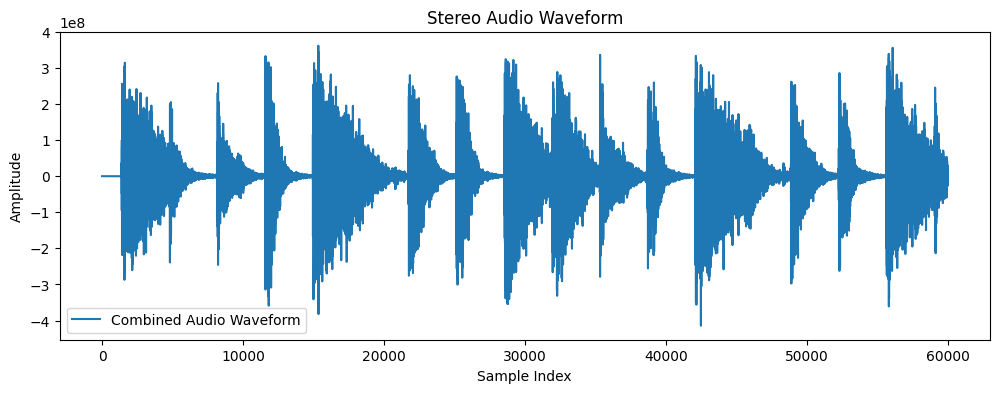

In [51]:
sample3 = sample2[20000:80000]

plot_waveform(sample3)

In [52]:
def list_of_consecutive_zeros(sample, threshold, duration):
    start_index = None
    segments = []
    for i, sample in enumerate(sample):
        if abs(sample[0]) < threshold and abs(sample[1]) < threshold:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None:
                if i - start_index > duration:
                    segments.append((start_index, i))
                start_index = None
    return segments

a = list_of_consecutive_zeros(sample3, 3000000, 10)

for i in range(len(a)):
    print("Start index: " + str(a[i][0]) +", until: " + str(a[i][1]) + " //Duration: " +  str(a[i][1]- a[i][0]))

Start index: 0, until: 1399 //Duration: 1399
Start index: 7327, until: 7340 //Duration: 13
Start index: 7487, until: 7499 //Duration: 12
Start index: 7556, until: 7573 //Duration: 17
Start index: 7764, until: 7775 //Duration: 11
Start index: 7819, until: 7832 //Duration: 13
Start index: 7883, until: 7899 //Duration: 16
Start index: 7908, until: 7920 //Duration: 12
Start index: 7943, until: 7975 //Duration: 32
Start index: 7976, until: 8007 //Duration: 31
Start index: 8008, until: 8021 //Duration: 13
Start index: 8024, until: 8039 //Duration: 15
Start index: 8047, until: 8084 //Duration: 37
Start index: 8085, until: 8111 //Duration: 26
Start index: 8114, until: 8158 //Duration: 44
Start index: 8164, until: 8175 //Duration: 11
Start index: 10891, until: 10902 //Duration: 11
Start index: 11410, until: 11431 //Duration: 21
Start index: 11436, until: 11447 //Duration: 11
Start index: 14240, until: 14258 //Duration: 18
Start index: 14270, until: 14281 //Duration: 11
Start index: 14327, until

In [ ]:
def find_longest_common_pattern(data):
    """Find the longest common pattern in the audio signal."""
    patterns = []
    max_length = 0

    # Iterate over the audio data
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            pattern = data[i:j]
            if len(pattern) > max_length and pattern in data[j:]:
                patterns.append(pattern)
                max_length = len(pattern)

    return patterns

# Find the longest common pattern in the audio signal
common_patterns = find_longest_common_pattern(sample)

# Print the longest common pattern
if common_patterns:
    longest_pattern = max(common_patterns, key=len)
    print("Longest common pattern:", longest_pattern)
else:
    print("No common pattern found.")


In [ ]:
class Audiopackage:
    
    #indexlist = list of [start, end]
    #audio = audio data

    indexlist = []
    
    def __init__(self, audio, samplerate, parsetype):
        self.audiosegmentlist = [] 
        self.audio = audio
        self.samplerate = samplerate
        self.parsetype = parsetype
        parse(self.type)
        self.length = len(audio)
    
    def parse(self):
        if self.parsetype == "exact":
            parseExact()
        elif self.parsetype == "similar":
            parseSimilar()
        elif self.parsetype == "spectrogram":
            parseSpectrogram()
        else:
            print("Error: Invalid type")

    def parseExact(self):
        #if a segment exact same, then append
        # indexlist[9].append(index)
            #compare length first
            #if length is same, then compare each sample
        #else indexlist.append(AudioSegment(audio, length, index))
        pass
    def parseSimilar(self):
        pass
    def parseSpectrogram(self):
        pass

    def export(self):
        export = np.zeros(self.length)
        ##add all data iteratively
        return export

class AudioSegment:
    indexlist = [10000, 30000, 50000..]
    audio = []
    length = 0
    #처음 불릴때
    def __init__(self, audio, length, index, amplitude = 1):
        self.indexlist = [] 
        indexlist.append(index)
        self.length = length
        self.audio = audio
        self.amplitude = amplitude
    def append(self, index, amplitude = 1):
        #초기 샘플보다 후기 샘플이 더 adaptable 할 경우
        self.indexlist.append(index)